**Frequent value imputation, to be applied when :

1. Missing completely at random
2. missing values in a column are <= 5%
3. Replace NA values with mode(most frequent value) but make sure the mode dominates the rest. It should not be comparable

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [5]:
df = pd.read_csv('train.csv',usecols=['GarageQual','FireplaceQu','SalePrice'])

In [6]:
df.head()

,FireplaceQu,GarageQual,SalePrice
0,NaN,TA,208500
1,TA,TA,181500
2,TA,TA,223500
3,Gd,TA,140000
4,TA,TA,250000


In [7]:
df.isnull().mean()*100

,0
FireplaceQu,47.260274
GarageQual,5.547945
SalePrice,0.000000


In [8]:
df['GarageQual'].value_counts()

,count
GarageQual,
TA,1311
Fa,48
Gd,14
Ex,3
Po,3


<Axes: xlabel='GarageQual'>

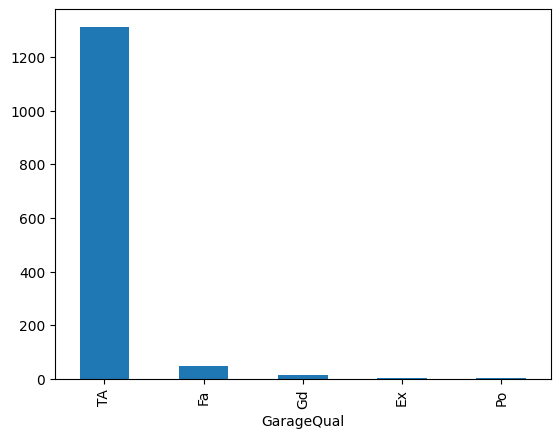

In [9]:
df['GarageQual'].value_counts().plot(kind='bar')

**most frequent element**

In [10]:
df['GarageQual'].mode()

,GarageQual
0,TA


In [11]:
df.shape

(1460, 3)

In [12]:
temp = df[df['GarageQual']=='TA']

temp

,FireplaceQu,GarageQual,SalePrice
0,NaN,TA,208500
1,TA,TA,181500
2,TA,TA,223500
3,Gd,TA,140000
4,TA,TA,250000
...,...,...,...
1455,TA,TA,175000
1456,TA,TA,210000
1457,Gd,TA,266500
1458,NaN,TA,142125


**applying PDF on 'SalePrice',

1. rows having 'TA'
2. rows having NA
**

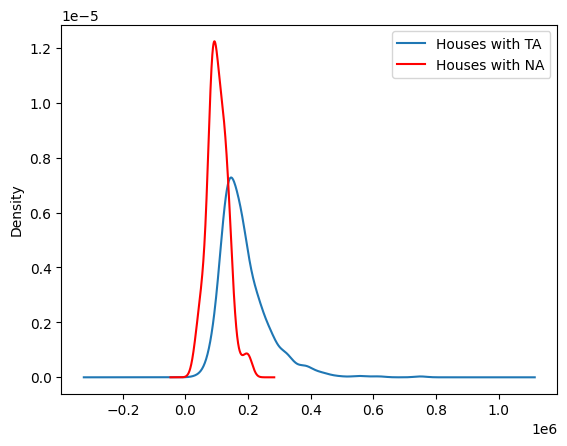

In [13]:
fig = plt.figure()
ax = fig.add_subplot(111)
temp.plot(kind='kde',ax=ax)
df[df['GarageQual'].isnull()]['SalePrice'].plot(kind='kde', ax=ax, color='red')
ax.legend(['Houses with TA','Houses with NA'])
plt.show()


**make sure the most frequent value is very higher than all the other values, it should not be comparable to any of the other values**

In [14]:
df['GarageQual'].fillna('TA',inplace=True)

/tmp/ipython-input-584385255.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['GarageQual'].fillna('TA',inplace=True)


<Axes: xlabel='GarageQual'>

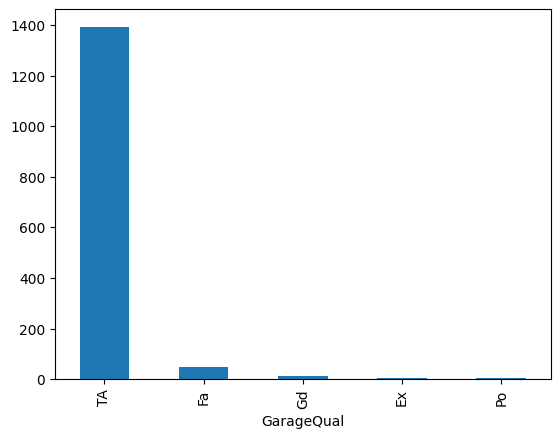

In [15]:
df['GarageQual'].value_counts().plot(kind='bar')

In [16]:
df.isnull().mean()

,0
FireplaceQu,0.472603
GarageQual,0.000000
SalePrice,0.000000


In [17]:
df['GarageQual'].value_counts()

,count
GarageQual,
TA,1392
Fa,48
Gd,14
Ex,3
Po,3


we can see that the 'TA' values have increased, since we filled the missing values with 'TA'

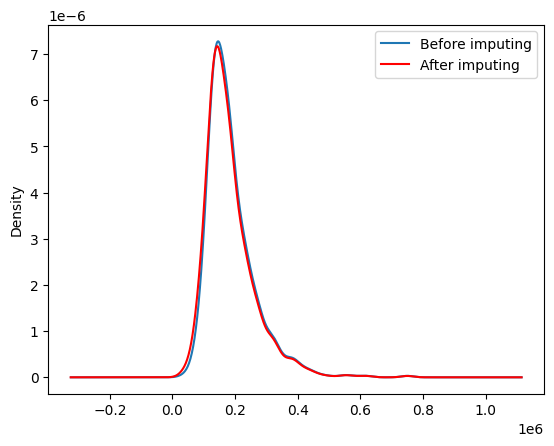

In [18]:
fig = plt.figure()
ax = fig.add_subplot(111)

# before imputation with 'TA'
temp.plot(kind='kde',ax=ax)

# after imputation with 'TA'
df[df['GarageQual']=='TA']['SalePrice'].plot(kind='kde',ax=ax,color='red')

ax.legend(['Before imputing','After imputing'])
plt.show()

**since there are around 5% missing values, there is not much change in distribution after imputing with 'TA'**

<Axes: xlabel='FireplaceQu'>

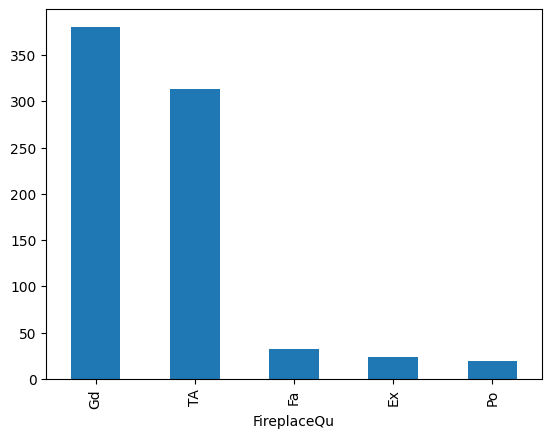

In [19]:
df['FireplaceQu'].value_counts().plot(kind='bar')

In [21]:
df.isnull().mean()*100

,0
FireplaceQu,47.260274
GarageQual,0.000000
SalePrice,0.000000


**here the mode value 'GD' is comparable to 'TA' and missing values is greater than >5%, so most frequent value imputation won't give good results**

In [22]:
df['FireplaceQu'].mode()

,FireplaceQu
0,Gd


In [24]:
# before imputation, rows having mode value 'Gd'
temp = df[df['FireplaceQu']=='Gd']['SalePrice']

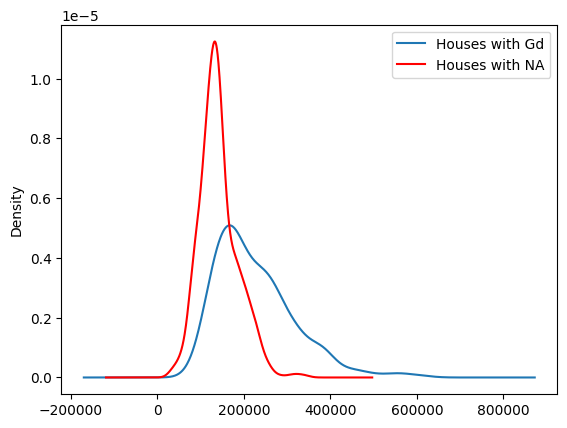

In [25]:
fig = plt.figure()
ax = fig.add_subplot(111)

# original before imputation
temp.plot(kind='kde',ax=ax)

df[df['FireplaceQu'].isnull()]['SalePrice'].plot(kind='kde',ax=ax,color='red')

ax.legend(['Houses with Gd','Houses with NA'])
plt.show()

In [27]:
df['FireplaceQu'].fillna('Gd',inplace=True)


/tmp/ipython-input-1421368423.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['FireplaceQu'].fillna('Gd',inplace=True)


<Axes: xlabel='FireplaceQu'>

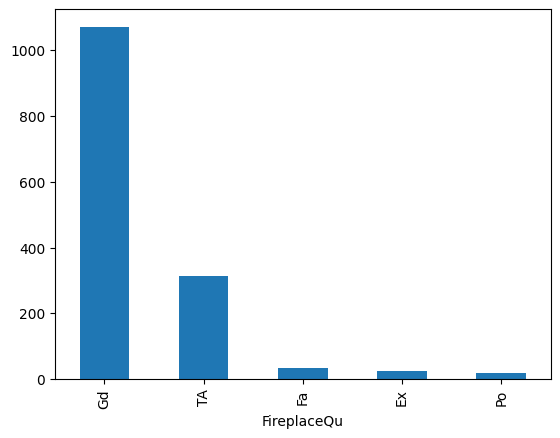

In [28]:
df['FireplaceQu'].value_counts().plot(kind='bar')

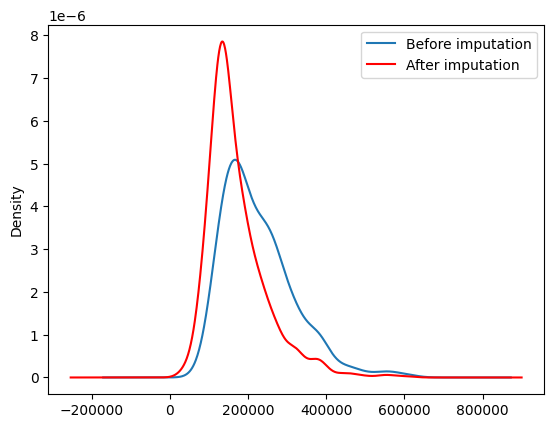

In [29]:
fig = plt.figure()
ax = fig.add_subplot(111)

# before imputation
temp.plot(kind='kde',ax=ax)

# after imputation
df[df['FireplaceQu']=='Gd']['SalePrice'].plot(kind='kde',ax=ax,color='red')

ax.legend(['Before imputation','After imputation'])
plt.show()

**since there are lots of missing values, and the mode is comparable to TA, we didnt get the right results, so we dont apply most frequent value imputation here, we go for missing category imputation**

**Using sklearn**

In [30]:
df.sample(2)

,FireplaceQu,GarageQual,SalePrice
756,Gd,TA,212000
244,Fa,TA,205000


In [31]:
X = df.drop(columns=['SalePrice'])
y = df['SalePrice']

In [32]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(
    X,y,test_size=0.2,random_state=2
)

In [33]:
from sklearn.impute import SimpleImputer

In [34]:
imputer = SimpleImputer(strategy = 'most_frequent')

In [35]:
X_train_transformed = imputer.fit_transform(X_train)
X_test_transformed = imputer.transform(X_test)

In [36]:
imputer.statistics_

array(['Gd', 'TA'], dtype=object)

**we can see that imputation is applied on FireplaceQu, and GarageQual, and the mode of both columns is returned**